In [1]:
# libraries for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

df = pd.read_csv('clean_data.csv')

# Show the data
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [54]:
# Columns data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   Tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [55]:
# Lots of info about each columns
df.describe()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [56]:
# Check if there is any null values
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [57]:
# Sum of the duplicates values
df.duplicated().sum()

np.int64(0)

In [58]:
# Show count of unique values
df.nunique()

CustomerID          7032
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [59]:
# Highest total charges
df.sort_values(by="TotalCharges", ascending=False).head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4602,2889-FPWRM,Male,0,1,0,72,1,1,Fiber optic,1,...,1,1,1,1,One year,1,Bank transfer (automatic),117.80,8684.80,1
4578,7569-NMZYQ,Female,0,1,1,72,1,1,Fiber optic,1,...,1,1,1,1,Two year,1,Bank transfer (automatic),118.75,8672.45,0
6757,9739-JLPQJ,Female,0,1,1,72,1,1,Fiber optic,1,...,1,1,1,1,Two year,0,Credit card (automatic),117.50,8670.10,0
5338,9788-HNGUT,Male,0,1,0,72,1,1,Fiber optic,1,...,1,1,1,1,Two year,1,Credit card (automatic),116.95,8594.40,0
2182,8879-XUAHX,Male,0,1,0,71,1,1,Fiber optic,1,...,1,1,1,1,Two year,1,Electronic check,116.25,8564.75,0


C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\344521004.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Churn", palette="pastel")


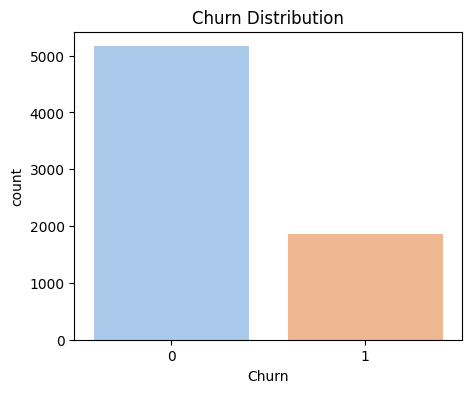

In [60]:
# Churn distribution
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Churn", palette="pastel")
plt.title("Churn Distribution")
plt.show()

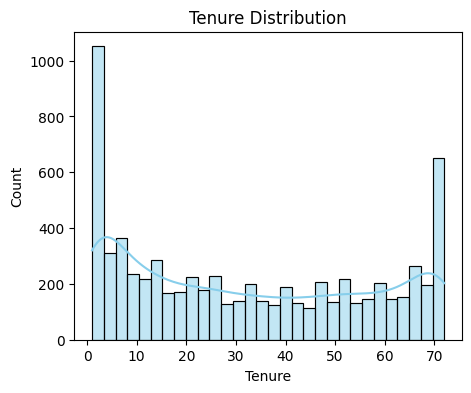

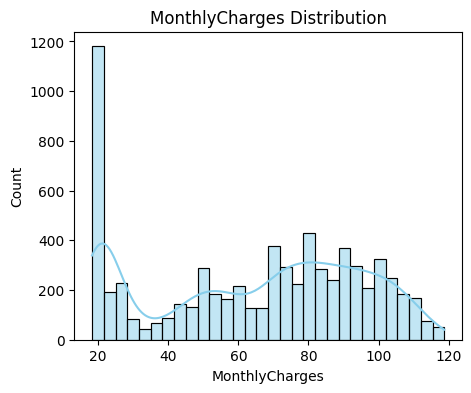

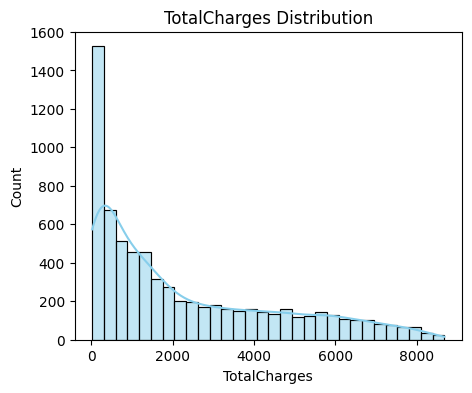

In [61]:
# Numerical Features Distribution
for col in ["Tenure", "MonthlyCharges", "TotalCharges"]:
    plt.figure(figsize=(5, 4))
    sns.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"{col} Distribution")
    plt.show()

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")


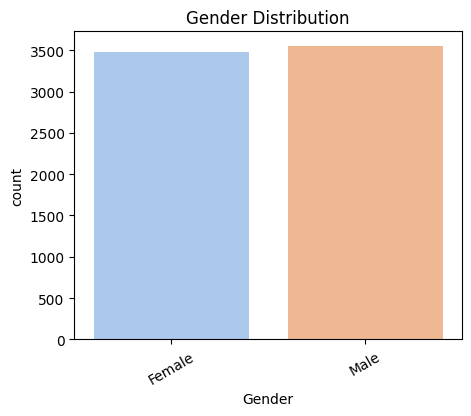

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


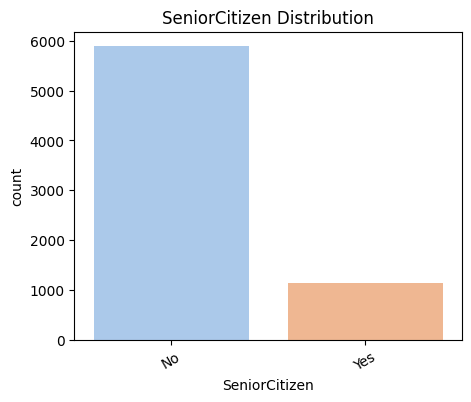

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


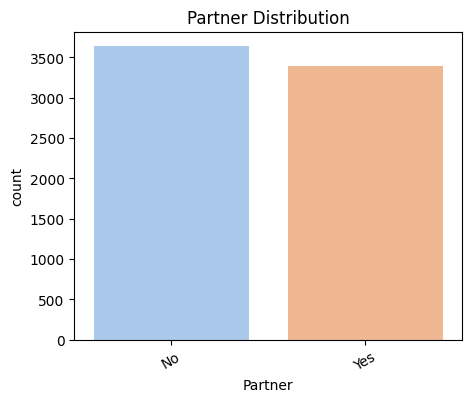

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


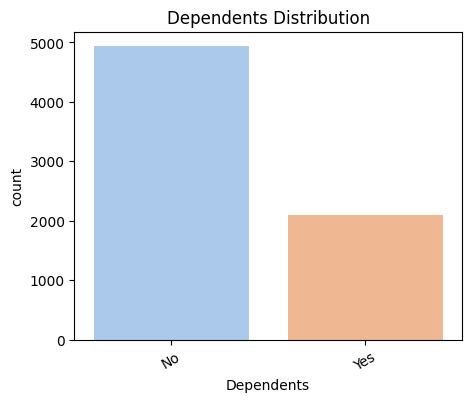

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


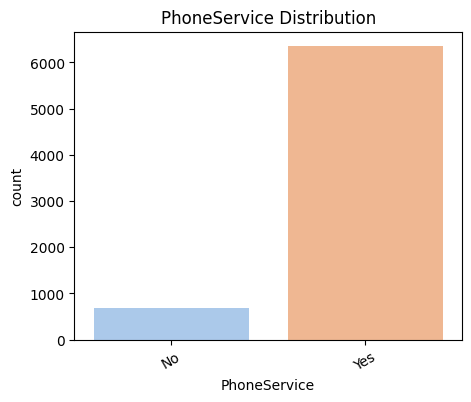

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


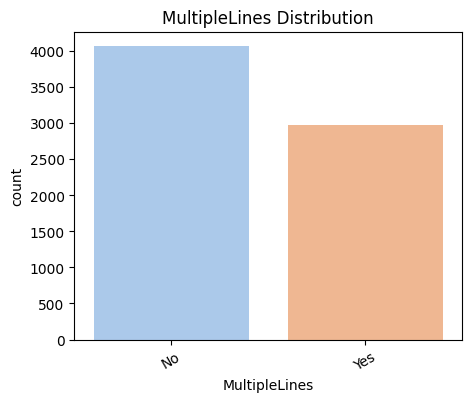

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")


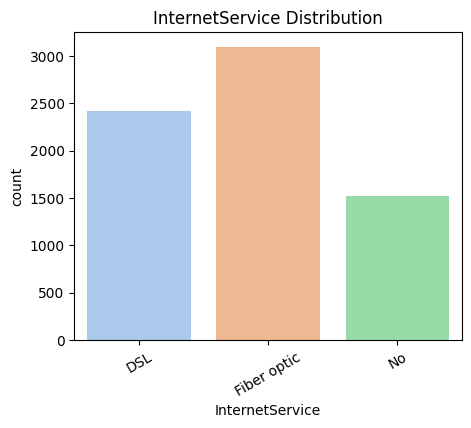

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


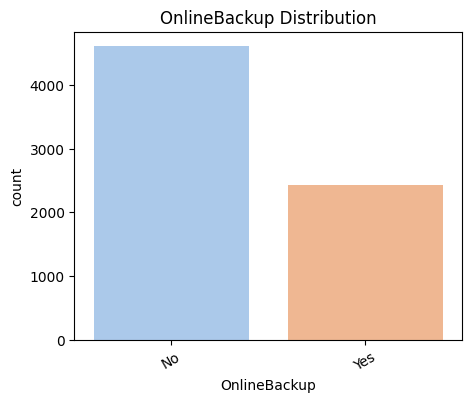

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


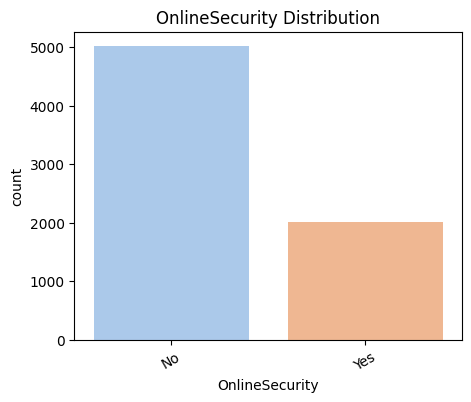

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


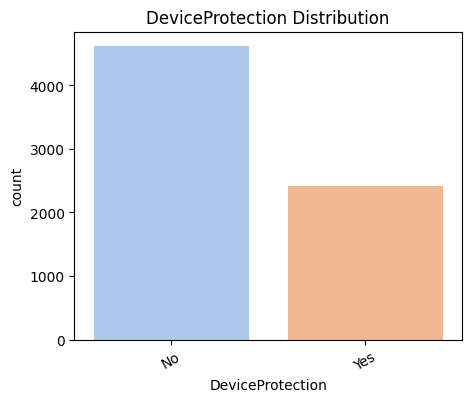

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


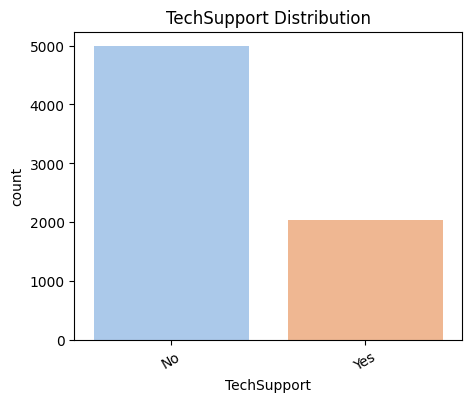

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


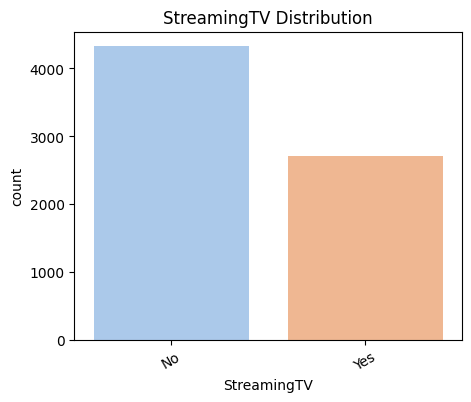

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


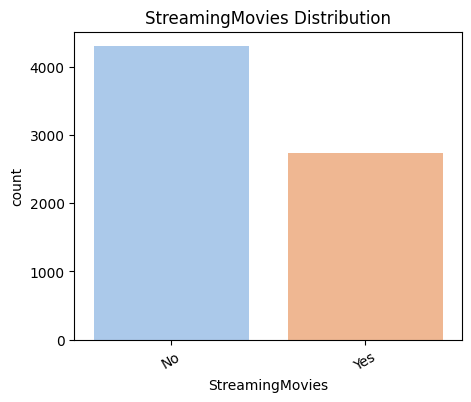

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")


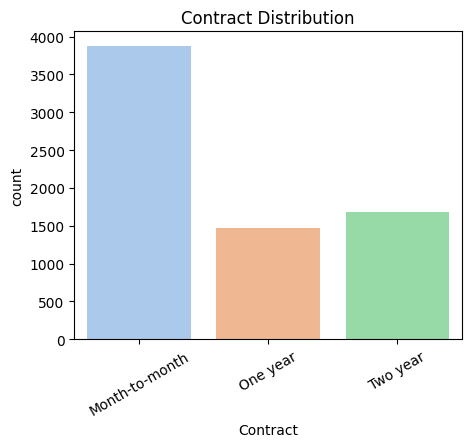

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")
C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])


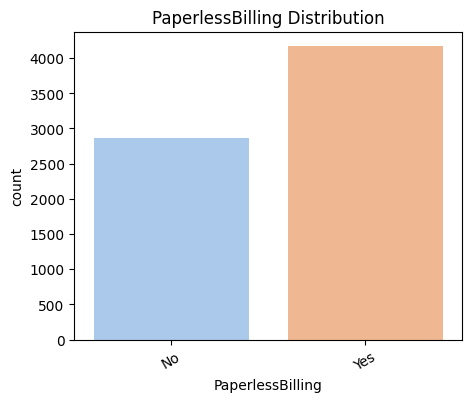

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\2714075954.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, palette="pastel")


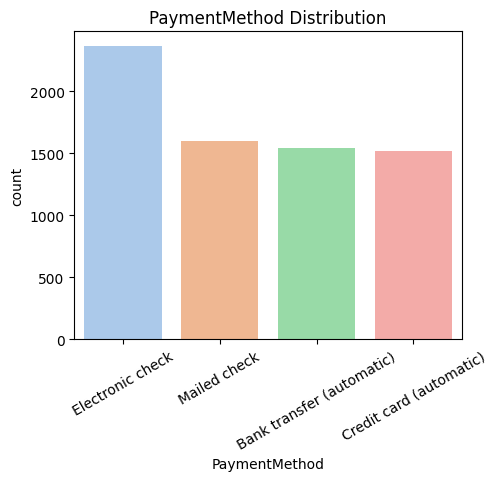

In [62]:
# Categoric Features Distribution
categoric_columns = ["Gender", "SeniorCitizen",	"Partner",	"Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineBackup", "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod"]
mapping = {0: 'No', 1: 'Yes'}

for col in categoric_columns:
    plt.figure(figsize=(5, 4))
    
    # Count plot
    ax = sns.countplot(data=df, x=col, palette="pastel")
    plt.title(f"{col} Distribution")
    
    if set(df[col].unique()) == {0, 1}:
        ax.set_xticklabels([mapping[int(label.get_text())] for label in ax.get_xticklabels()])

    plt.xticks(rotation=30)
    plt.show()

C:\Users\lukes\AppData\Local\Temp\ipykernel_17384\20783303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="pastel")


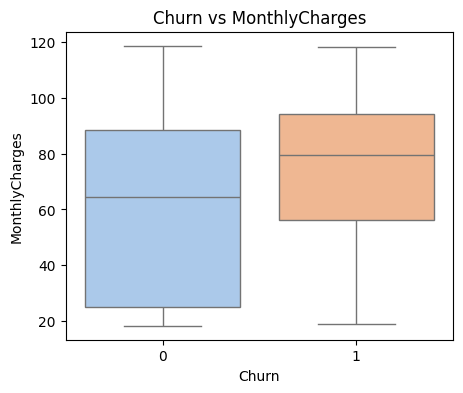

In [63]:
# Churn vs. MonthlyCharges BoxPlot
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", palette="pastel")
plt.title("Churn vs MonthlyCharges")
plt.show()

C:\Users\lukes\AppData\Local\Temp\ipykernel_14604\592439414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='pastel')


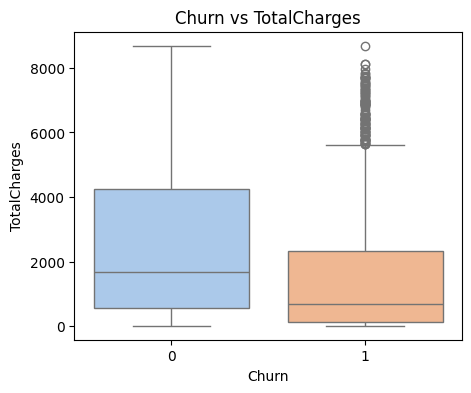

In [ ]:
# Churn vs. TotalCharges BoxPlot
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='pastel')
plt.title('Churn vs TotalCharges')
plt.show()

C:\Users\lukes\AppData\Local\Temp\ipykernel_14604\1375683313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='Tenure', palette='pastel')


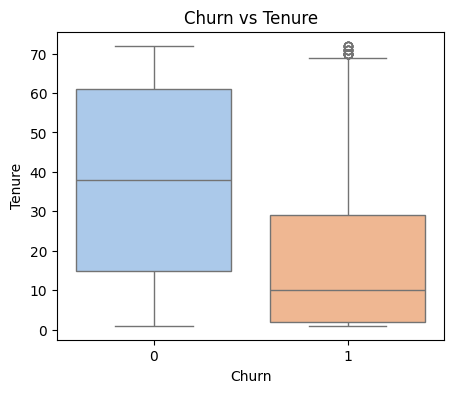

In [ ]:
# Churn vs. Tenure BoxPlot
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Churn', y='Tenure', palette='pastel')
plt.title('Churn vs Tenure')
plt.show()

In [64]:
# Correlations between numerical values
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                  SeniorCitizen   Partner  Dependents    Tenure  PhoneService  \
SeniorCitizen          1.000000  0.016957   -0.210550  0.015683      0.008392   
Partner                0.016957  1.000000    0.452269  0.381912      0.018397   
Dependents            -0.210550  0.452269    1.000000  0.163386     -0.001078   
Tenure                 0.015683  0.381912    0.163386  1.000000      0.007877   
PhoneService           0.008392  0.018397   -0.001078  0.007877      1.000000   
MultipleLines          0.142996  0.142561   -0.024307  0.332399      0.279530   
OnlineSecurity        -0.038576  0.143346    0.080786  0.328297     -0.091676   
OnlineBackup           0.066663  0.141849    0.023639  0.361138     -0.052133   
DeviceProtection       0.059514  0.153556    0.013900  0.361520     -0.070076   
TechSupport           -0.060577  0.120206    0.063053  0.325288     -0.095138   
StreamingTV            0.105445  0.124483   -0.016499  0.280264     -0.021383   
StreamingMovies        0.119

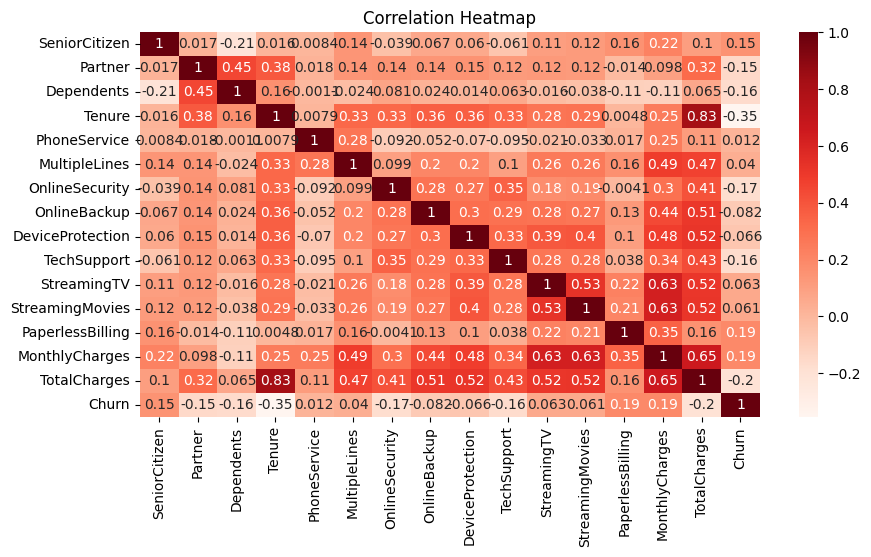

In [66]:

# Create heatmap for the correlations between numerical values
sns.heatmap(numeric_df.corr(), annot=True, cmap="Reds")

plt.rcParams['figure.figsize'] = (15, 5)
plt.title("Correlation Heatmap")
plt.show()

In [68]:
# Modeling
# Encoding categorical variables
categorical_columns = ['InternetService', 'Contract']
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col + "_encoded"] = label_encoders[col].fit_transform(df[col])

# Scaling numerical features
scaler = StandardScaler()
df[['Tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['Tenure', 'MonthlyCharges', 'TotalCharges']])

# Selecting relevant features
features = ["InternetService_encoded", "Contract_encoded", "Tenure", "MonthlyCharges", "TotalCharges"]
X = df[features]
y = df["Churn"]

df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_encoded,Contract_encoded
0,7590-VHVEG,Female,0,1,0,-1.280248,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,-1.161694,-0.994194,0,0,0
1,5575-GNVDE,Male,0,0,0,0.064303,1,0,DSL,1,...,0,0,One year,0,Mailed check,-0.260878,-0.173740,0,0,1
2,3668-QPYBK,Male,0,0,0,-1.239504,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,-0.363923,-0.959649,1,0,0
3,7795-CFOCW,Male,0,0,0,0.512486,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),-0.747850,-0.195248,0,0,1
4,9237-HQITU,Female,0,0,0,-1.239504,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,0.196178,-0.940457,1,1,0


In [69]:
# Splitting the datset into 80% training 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()
# Train the model
model.fit(x_train, y_train)


LogisticRegression()

In [70]:
# Making predictions
y_pred = model.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.78
Precision: 0.61
Recall: 0.48
F1 Score: 0.54


In [71]:
# Recall is 0.48, which suggests it's missing a significant portion of actual churn cases. Here I'm doing oversamling to increase Recall.
# Initialize SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply oversampling on the training set
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

# Class distribution after oversampling
import collections
print("Class distribution before SMOTE:", collections.Counter(y_train))
print("Class distribution after SMOTE:", collections.Counter(y_train_smote))

Class distribution before SMOTE: Counter({0: 4130, 1: 1495})
Class distribution after SMOTE: Counter({1: 4130, 0: 4130})


In [72]:
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# Evaluate on the test set
y_pred_smote = model_smote.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred_smote)
precision = precision_score(y_test, y_pred_smote)
recall = recall_score(y_test, y_pred_smote)
f1 = f1_score(y_test, y_pred_smote)

print(f"After SMOTE - Accuracy: {accuracy:.2f}")
print(f"After SMOTE - Precision: {precision:.2f}")
print(f"After SMOTE - Recall: {recall:.2f}")
print(f"After SMOTE - F1 Score: {f1:.2f}")

After SMOTE - Accuracy: 0.71
After SMOTE - Precision: 0.47
After SMOTE - Recall: 0.83
After SMOTE - F1 Score: 0.60


In [73]:
# Over sampling caused precision drop from 0.61 to 0.47
# Get probabilities for churn prediction
y_probabilities = model_smote.predict_proba(x_test)[:, 1]
# Adjust the threshold
threshold = 0.6 
y_pred_adjusted = (y_probabilities >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred_adjusted)
precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

print(f"New Threshold ({threshold}) - Accuracy: {accuracy:.2f}")
print(f"New Threshold ({threshold}) - Precision: {precision:.2f}")
print(f"New Threshold ({threshold}) - Recall: {recall:.2f}")
print(f"New Threshold ({threshold}) - F1 Score: {f1:.2f}")


New Threshold (0.6) - Accuracy: 0.74
New Threshold (0.6) - Precision: 0.51
New Threshold (0.6) - Recall: 0.71
New Threshold (0.6) - F1 Score: 0.60


In [74]:
# Importance of features in prediction
feature_importance = pd.DataFrame({"Feature": features, "Coefficient": model.coef_[0]})
print(feature_importance)

                   Feature  Coefficient
0  InternetService_encoded     0.014467
1         Contract_encoded    -1.067298
2                   Tenure    -1.326247
3           MonthlyCharges     0.762245
4             TotalCharges     0.505173


In [83]:
# Ompimizing the model
model_optimized = LogisticRegression(C=0.1, penalty='l2')
model_optimized.fit(x_train, y_train)

LogisticRegression(C=0.1)